In [1]:
import pandas as pd

In [2]:
best_path = "/opt/ml/input/data/eval/sub1.csv"
cur_path = "/opt/ml/input/data/eval/submission_detection_crop4.csv"

In [3]:
df_best = pd.read_csv(best_path)
df_cur = pd.read_csv(cur_path)

In [4]:
df_best

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,2
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,4
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,1


In [5]:
df_cur

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,13
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,2
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,13
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,13
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,12
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,2
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,4
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,9
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,3


In [6]:
(df_best['ans'] != df_cur['ans']).sum()

3294

In [7]:
import seaborn as sns

In [8]:
diff_df_best = df_best[df_best['ans'] != df_cur['ans']]
diff_df_cur = df_cur[df_best['ans'] != df_cur['ans']]

In [9]:
diff_df_best

,ImageID,ans
6,1903db7dcc1262d0441677afa422e6a8371e5b37.jpg,7
7,441419a874f4d031cd576850b68539ca7d35bedf.jpg,4
10,9028e8c54f80096bf4e43390caf003f64c90e5ce.jpg,13
18,7665a0a126eec039d2c8baf9c6eedc004738c128.jpg,7
20,d352bb22eca23e75e710b427ae831a867dd37bfb.jpg,12
...,...,...
12577,c01dd7221645a39539b6f23667a8737450939a05.jpg,7
12578,68ea453a2a3a67dad0b5f913981c347fd51767d4.jpg,16
12580,587b87a3428c0715623e4250889544dd8e30e11f.jpg,14
12592,b8baa9fb4d8da1dd529c857fc74d91c1abacd19c.jpg,1


In [10]:
diff_df_cur

,ImageID,ans
6,1903db7dcc1262d0441677afa422e6a8371e5b37.jpg,8
7,441419a874f4d031cd576850b68539ca7d35bedf.jpg,3
10,9028e8c54f80096bf4e43390caf003f64c90e5ce.jpg,14
18,7665a0a126eec039d2c8baf9c6eedc004738c128.jpg,8
20,d352bb22eca23e75e710b427ae831a867dd37bfb.jpg,6
...,...,...
12577,c01dd7221645a39539b6f23667a8737450939a05.jpg,5
12578,68ea453a2a3a67dad0b5f913981c347fd51767d4.jpg,17
12580,587b87a3428c0715623e4250889544dd8e30e11f.jpg,13
12592,b8baa9fb4d8da1dd529c857fc74d91c1abacd19c.jpg,2


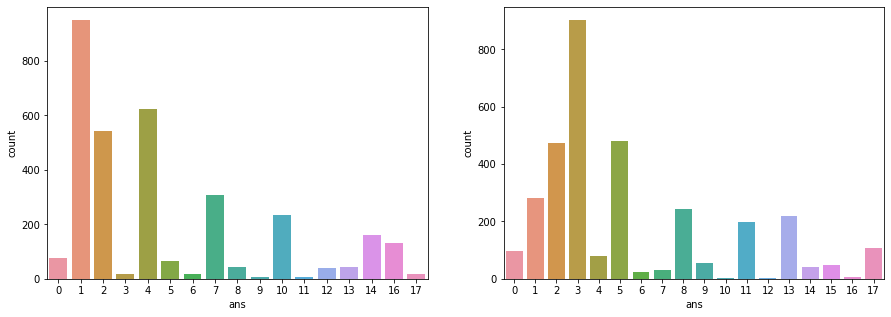

In [11]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data = diff_df_best, x = diff_df_best['ans'], ax=axes[0])
sns.countplot(data = diff_df_cur, x = diff_df_cur['ans'], ax=axes[1])

In [12]:
output_samples = diff_df_best.sample(7)
output_samples.head()

,ImageID,ans
5355,0ec02cb95ba5f1d8303df75f405d2a1ab8ea3b20.jpg,1
1133,82c16bef3da363d9587d20d19bacaf151825d2ec.jpg,10
814,a9293926383057d70ff3bed5c522036d44f6e0f4.jpg,13
12210,3226c91bae4fbba7769f6717e7ab94447e1096cd.jpg,4
743,d4e7c4d539656af47c66058c30c8b7a10dfa72dd.jpg,1


In [13]:
eval_dir_path = "/opt/ml/input/data/new_images/"

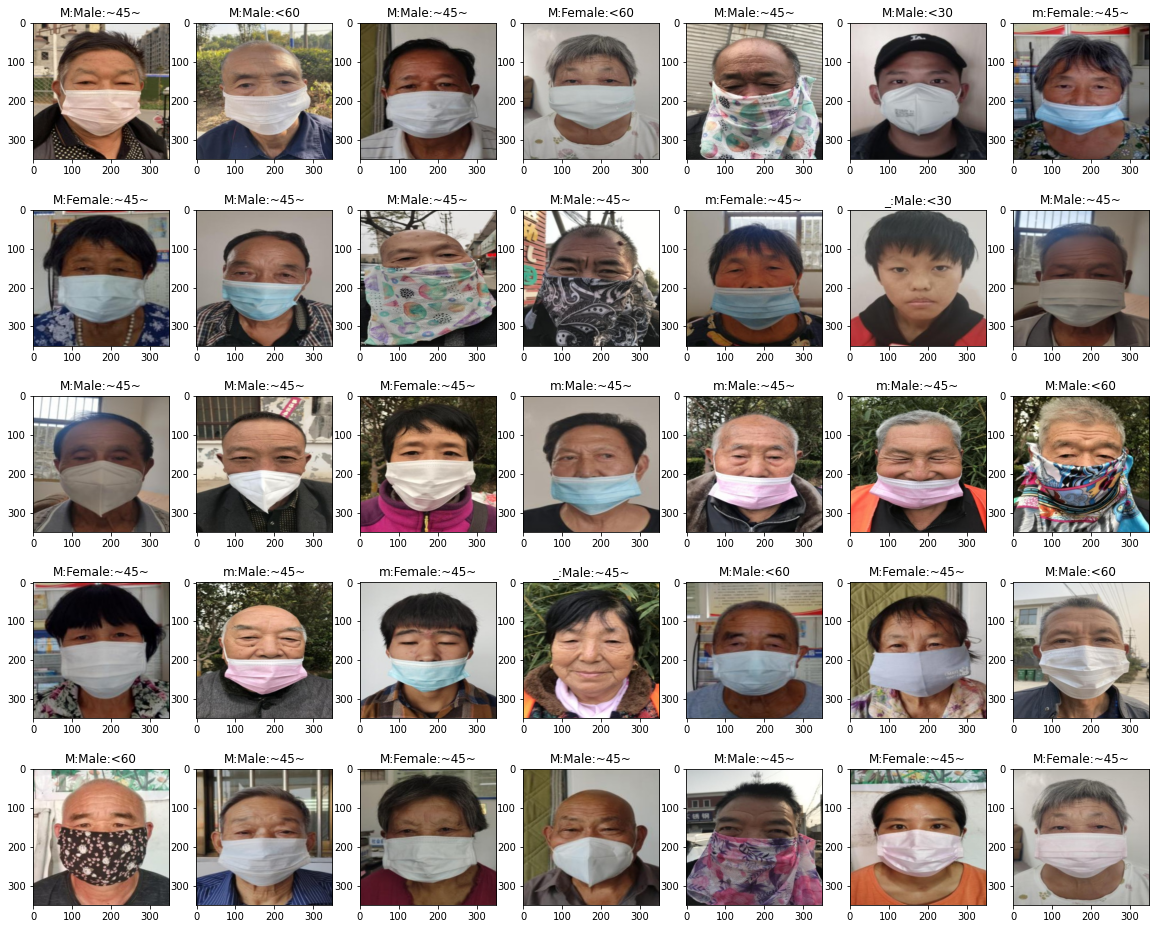

In [14]:
import os
import matplotlib.pyplot as plt
import cv2

def show_result(df):
    classname = ['M:Male:<30','M:Male:~45~','M:Male:<60',
                 'M:Female:<30','M:Female:~45~','M:Female:<60',
                 'm:Male:<30','m:Male:~45~','m:Male:<60',
                 'm:Female:<30','m:Female:~45~','m:Female:<60',
                 '_:Male:<30','_:Male:~45~','_:Male:<60',
                 '_:Female:<30','_:Female:~45~','_:Female:<60']
    plt.figure(figsize=(20, 20))
    columns = 7
    person_len = len(df)
    for person_id in range(person_len):
        filename = eval_dir_path + f"{df.iloc[person_id]['ImageID']}"
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(person_len // columns + 1, columns, person_id + 1)
        plt.imshow(img)
        plt.gca().set_title(classname[df.iloc[person_id]['ans']])

output_samples = diff_df_best.sample(5 * 7)
show_result(output_samples)